First 5 rows of the dataset:
  Location  Size  Number of rooms  Price
0    urban     1              4.0  120.0
1    urban     5              7.0  115.0
2    urban    11              3.0   74.0
3    urban    15              1.0   30.0
4    urban    24              2.0  150.0

Column names:
['Location', 'Size', 'Number of rooms', 'Price']

Model Evaluation:
RMSE: 56.87
R² Score: 0.44

Model Coefficients:
             Feature  Coefficient
0               Size  1274.249762
1    Number of rooms   957.574990
2  Location_Suburban    24.002752
3     Location_Urban    68.494214
4     Location_urban    31.059934


C:\Users\Unnati\AppData\Local\Temp\ipykernel_20516\2510579934.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[size_col].fillna(data[size_col].median(), inplace=True)
C:\Users\Unnati\AppData\Local\Temp\ipykernel_20516\2510579934.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

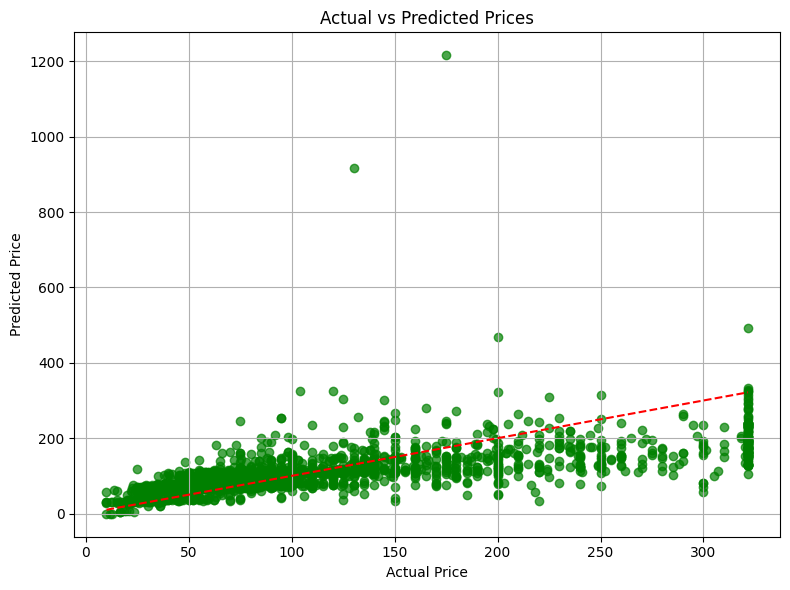

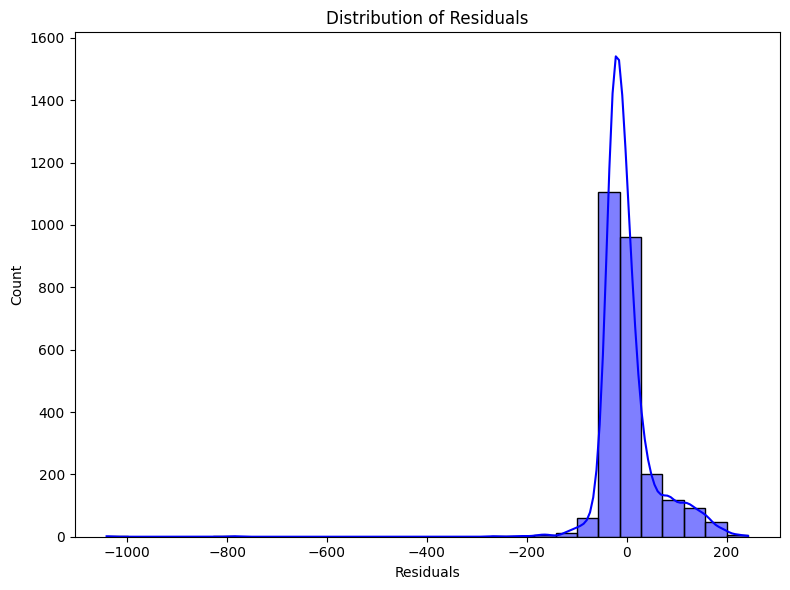

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler


data = pd.read_csv(r'C:\Users\Unnati\Downloads\house_price.csv')


print("First 5 rows of the dataset:")
print(data.head())


print("\nColumn names:")
print(data.columns.tolist())


size_col = next((col for col in data.columns if 'size' in col.lower()), None)

room_col = next((col for col in data.columns if 'room' in col.lower()), None)

price_col = next((col for col in data.columns if 'price' in col.lower()), None)

location_col = next((col for col in data.columns if 'location' in col.lower()), None)


if None in [size_col, room_col, price_col, location_col]:
    raise ValueError("Could not find one or more required columns (size, room, price, location).")


data[size_col].fillna(data[size_col].median(), inplace=True)
data[room_col].fillna(data[room_col].median(), inplace=True)


upper_limit = data[price_col].quantile(0.95)
data[price_col] = np.where(data[price_col] > upper_limit, upper_limit, data[price_col])


data = pd.get_dummies(data, columns=[location_col], drop_first=True)


scaler = MinMaxScaler()
data[[size_col, room_col]] = scaler.fit_transform(data[[size_col, room_col]])


X = data.drop(price_col, axis=1)
y = data[price_col]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


print("\nModel Coefficients:")
coeff_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coeff_df)


plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.tight_layout()
plt.show()


residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.tight_layout()
plt.show()
